<a href="https://colab.research.google.com/github/MadgeneM/DDS8555/blob/main/MoiseMDDS8555_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Title: Assignment 5
# Author: Madgene Moise
# Date: Sunday, June 15, 2025

The following section answers the Conceptual Question #13 from pages 196 and 197 of the textbook titled “An Introduction to Statistical Learning with Applications in Python” (ISLR Python), a.k.a. the Python edition (ISLP). The following Python programming script was written to answer Question #13 from pages 196 and 197.

In [ ]:
# Answer to applied question #13
# Access all the files in Google Colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the uploaded Weekly dataset
import pandas as pd

# Load the CSV file
weekly_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DDS8555/Weekly.csv")

# Question #13 part (a)
# Show basic info and summary statistics
info = weekly_df.info()
summary = weekly_df.describe()

# Display the first few rows as well
head = weekly_df.head()

info, summary, head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


(None,
               Year         Lag1         Lag2         Lag3         Lag4  \
 count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
 mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
 std       6.033182     2.357013     2.357254     2.360502     2.360279   
 min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
 25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
 50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
 75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
 max    2010.000000    12.026000    12.026000    12.026000    12.026000   
 
               Lag5       Volume        Today  
 count  1089.000000  1089.000000  1089.000000  
 mean      0.139893     1.574618     0.149899  
 std       2.361285     1.686636     2.356927  
 min     -18.195000     0.087465   -18.195000  
 25%      -1.166000     0.332022    -1.154000  
 50%       0.234000     1.00

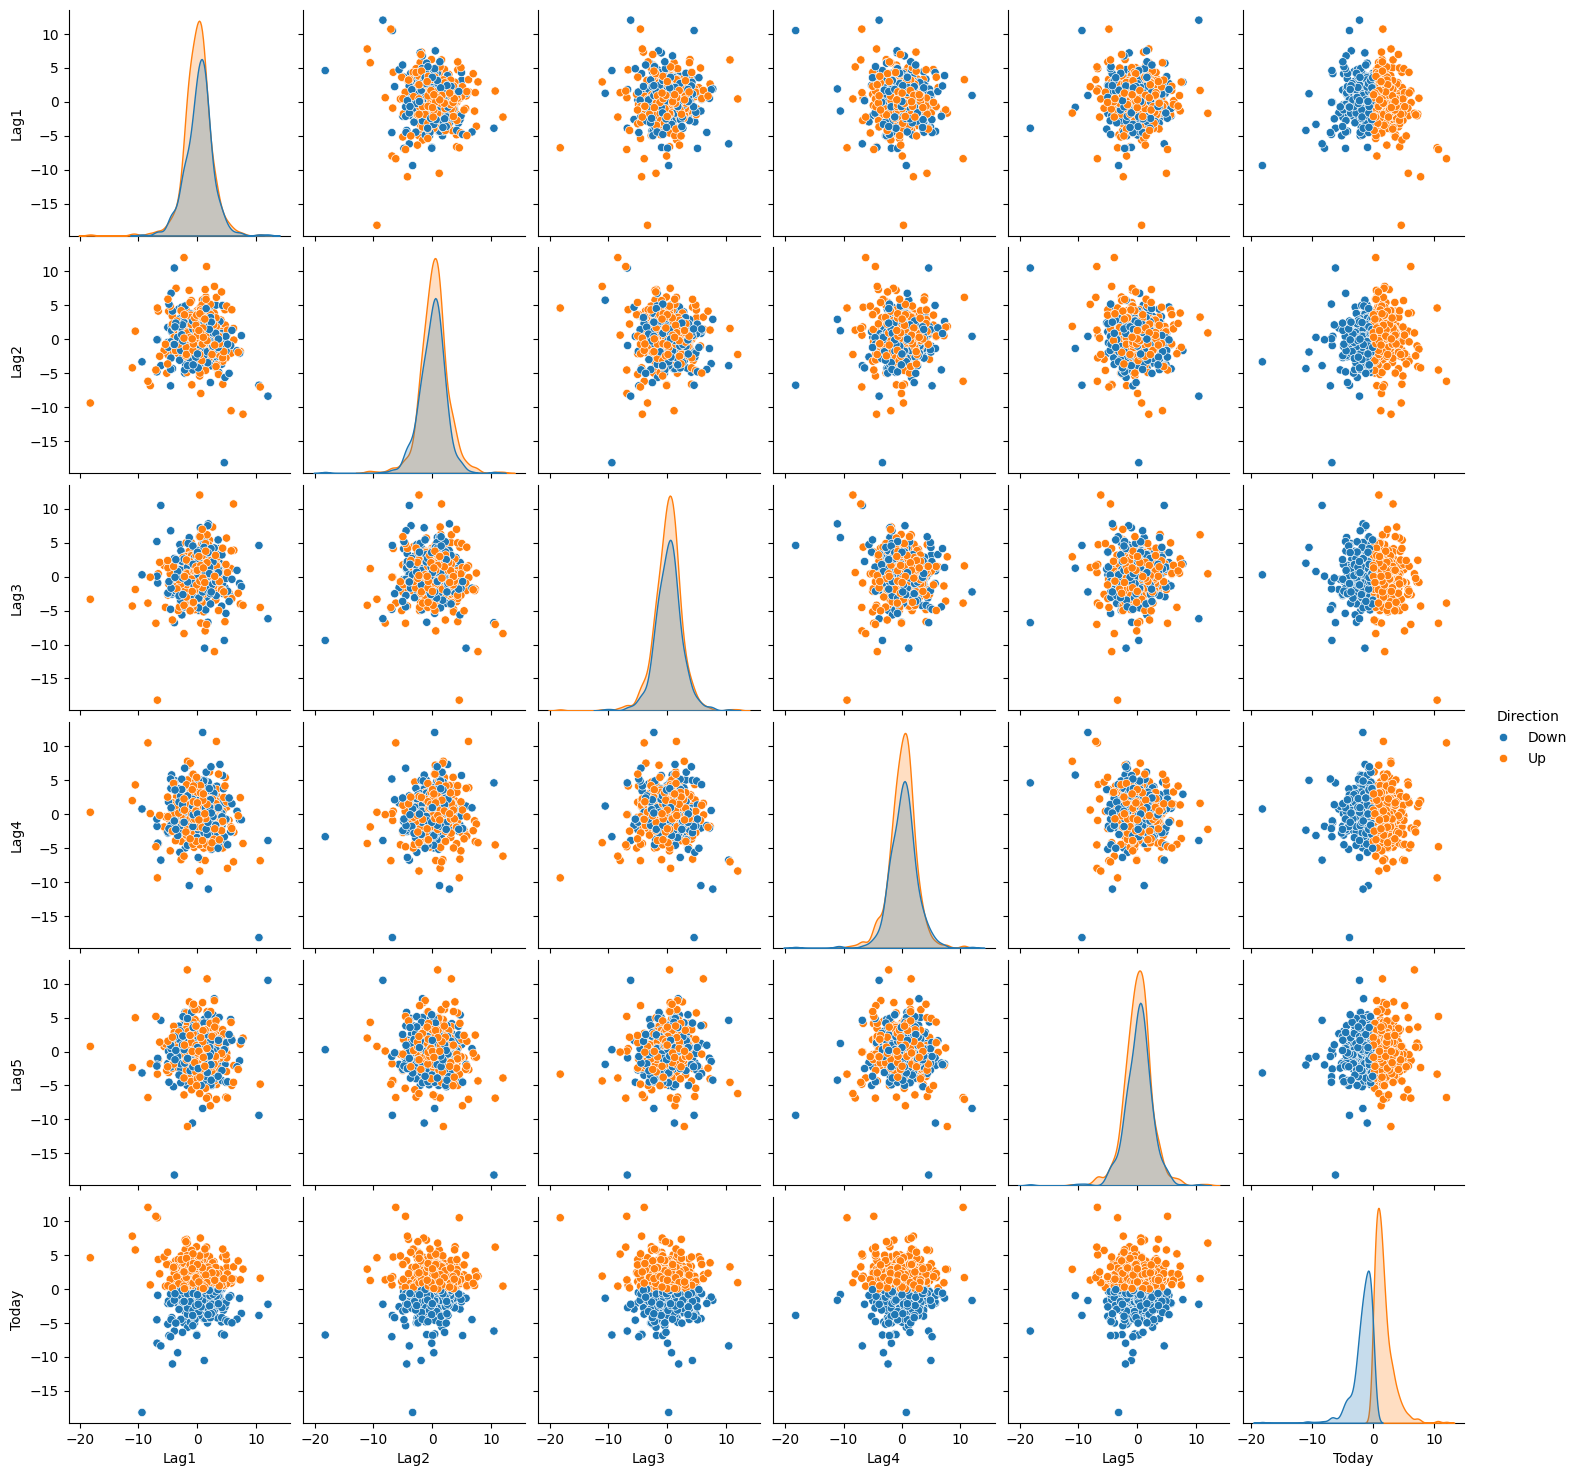

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create pairplot for Lag variables and Today
sns.pairplot(weekly_df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Today', 'Direction']], hue='Direction')
plt.show()

The diagonal kernel density estimates (KDE) plots show the distribution (density) of each variable for Up (orange) and Down (blue) weeks. For all Lag variables and the Today variable, both distributions largely overlap, indicating that the mean returns for Up vs Down are very similar. Slight mean difference exist but are minor (supporting the low predictive power). There is no clear pattern or trend in the scatterplots.

The off-diagonal scatterplots show the pairwise relationships between variables, colored by Direction. The scatter is very diffuse and round, indicating weak or no clear linear relationship between any two lagged returns. There is no obvious separation of Up and Down clusters. Both classes appear to be mixed within the same range.

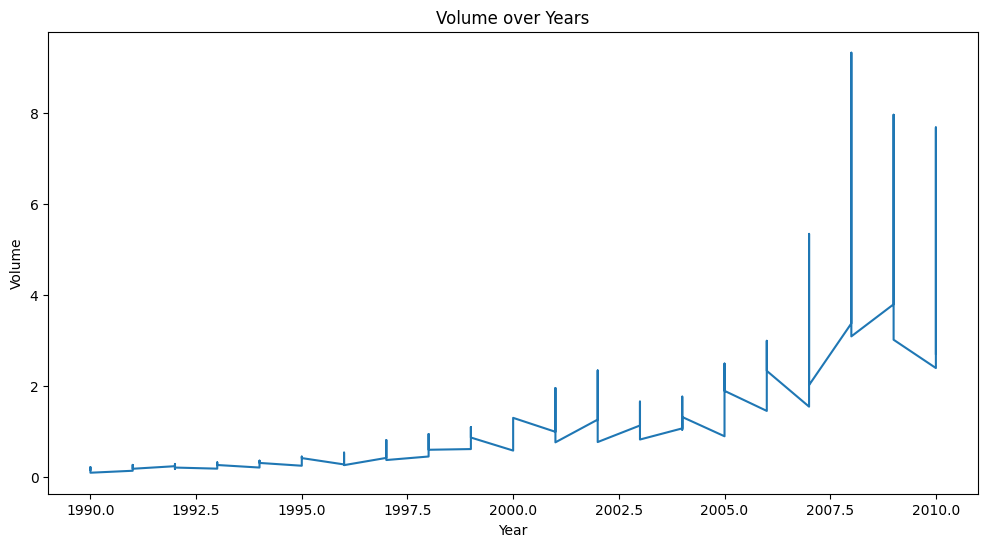

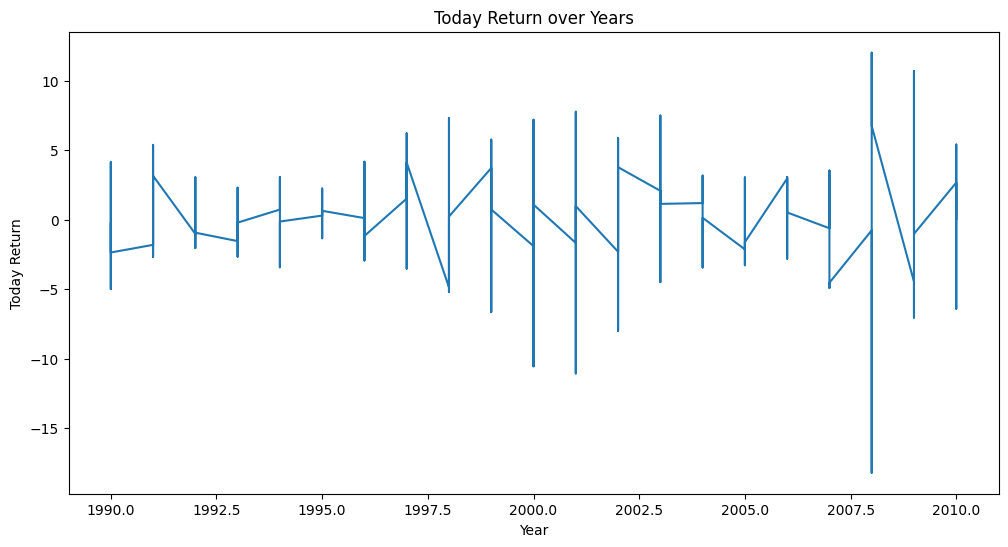

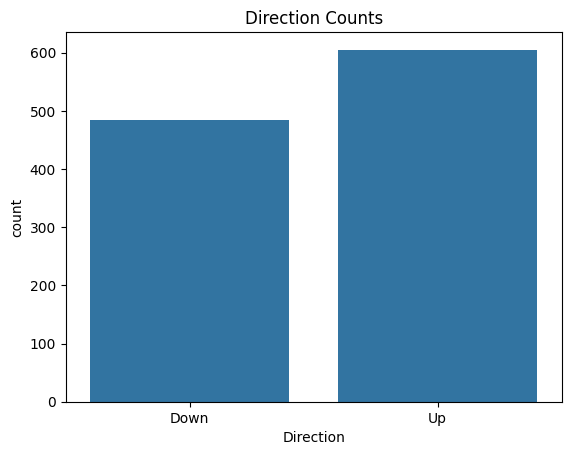

In [ ]:
# Plot Volume over time
plt.figure(figsize=(12, 6))
plt.plot(weekly_df['Year'], weekly_df['Volume'])
plt.xlabel('Year')
plt.ylabel('Volume')
plt.title('Volume over Years')
plt.show()

# Plot Today returns over time
plt.figure(figsize=(12, 6))
plt.plot(weekly_df['Year'], weekly_df['Today'])
plt.xlabel('Year')
plt.ylabel('Today Return')
plt.title('Today Return over Years')
plt.show()

# Countplot for Direction
sns.countplot(x='Direction', data=weekly_df)
plt.title('Direction Counts')
plt.show()

The Volume vs. Year Plot: Volume shows a clear upward trend over the years. This indicates trading activity has increased over time.

The Today vs. Year Plot: Returns appear to fluctuate randomly around zero. There is no clear upward or downward trend.

Direction counts: There are slightly more Up weeks than Down weeks.

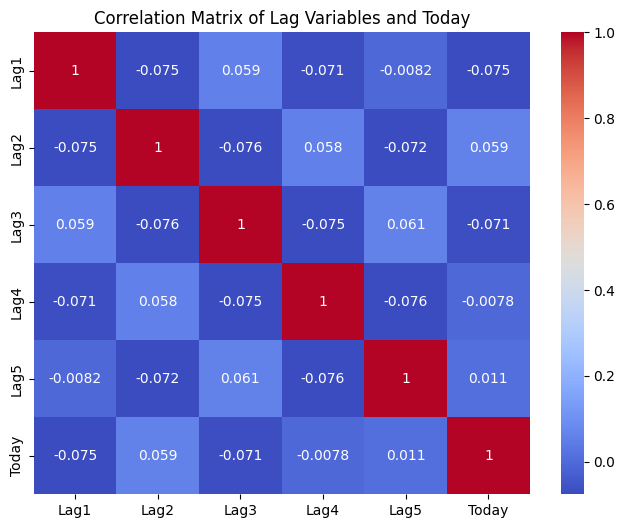

In [ ]:
# Compute correlation matrix for numeric variables
corr_matrix = weekly_df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Today']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Lag Variables and Today')
plt.show()

The correlation matrix heatmap shows very low correlations between the Lag variables and the Today variable. This suggests weak linear relationships.

In [ ]:
# Question #13 part (b)
# Perform logistic regression: Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume

import statsmodels.api as sm
import numpy as np

# Encode Direction: Up = 1, Down = 0
weekly_df['Direction_binary'] = np.where(weekly_df['Direction'] == 'Up', 1, 0)

# Define predictors and response
X = weekly_df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
X = sm.add_constant(X)  # add intercept
y = weekly_df['Direction_binary']

# Fit logistic regression
logit_model = sm.Logit(y, X).fit()

# Summary of logistic regression
logit_summary = logit_model.summary()

logit_summary

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Direction_binary   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Mon, 16 Jun 2025   Pseudo R-squ.:                0.006580
Time:                        00:11:23   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

**Logistic Regression Model:**
Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume

Only the Lag2 variable is statistically significant at the 5% level. The intercept at 0.2669 is also significant at p = 0.002. The other predictors (Lag1, Lag3, Lag4, Lag5, Volume) do not show significant predictive power for the Direction variable.

In [ ]:
# Question #13 part (c)
from sklearn.metrics import confusion_matrix, accuracy_score

# Predict probabilities
y_pred_prob = logit_model.predict(X)

# Convert to class labels: threshold 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Confusion matrix
cm = confusion_matrix(y, y_pred)

# Accuracy
accuracy = accuracy_score(y, y_pred)

cm, accuracy

(array([[ 54, 430],
        [ 48, 557]]),
 0.5610651974288338)

The model predicts Up much more often than Down. Many actual Down weeks are misclassified as Up, which indicates high false positives for Up. The overall prediction is slightly better than random guessing, but not very strong. This shows that logistic regression struggles to capture the patterns in the data with the current predictors.

In [ ]:
# Question #13 part (d)
# Split into training (1990–2008) and test (2009–2010)
train = weekly_df[weekly_df['Year'] <= 2008]
test = weekly_df[weekly_df['Year'] > 2008]

# Train logistic regression on training data with Lag2 only (as it's significant)
X_train = train[['Lag2']]
X_train = sm.add_constant(X_train)
y_train = np.where(train['Direction'] == 'Up', 1, 0)

logit_train = sm.Logit(y_train, X_train).fit()

# Predict on test data
X_test = test[['Lag2']]
X_test = sm.add_constant(X_test)
y_test = np.where(test['Direction'] == 'Up', 1, 0)

y_pred_prob_test = logit_train.predict(X_test)
y_pred_test = np.where(y_pred_prob_test > 0.5, 1, 0)

# Confusion matrix and accuracy
cm_test = confusion_matrix(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

logit_train.summary(), cm_test, accuracy_test

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4


(<class 'statsmodels.iolib.summary.Summary'>
 """
                            Logit Regression Results                           
 Dep. Variable:                      y   No. Observations:                  985
 Model:                          Logit   Df Residuals:                      983
 Method:                           MLE   Df Model:                            1
 Date:                Mon, 16 Jun 2025   Pseudo R-squ.:                0.003076
 Time:                        00:43:58   Log-Likelihood:                -675.27
 converged:                       True   LL-Null:                       -677.35
 Covariance Type:            nonrobust   LLR p-value:                   0.04123
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 const          0.2033      0.064      3.162      0.002       0.077       0.329
 Lag2           0.0581      0.029      2.024      0.043       0.002   

The model slightly improves on the training but still misclassifies many Down weeks. Again, the model favors predicting Up.

In [ ]:
# Question #13 part (e)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Linear Discriminant Analysis (LDA) using Lag2 on training data
lda = LinearDiscriminantAnalysis()
lda.fit(X_train[['Lag2']], y_train)

# Predict on test data
y_pred_lda = lda.predict(X_test[['Lag2']])

# Confusion matrix and accuracy
cm_lda = confusion_matrix(y_test, y_pred_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)

cm_lda, accuracy_lda

(array([[ 9, 34],
        [ 5, 56]]),
 0.625)

The linear discriminant analysis (LDA) model using Lag2 produces exactly the same confusion matrix and accuracy as the logistic regression in part (d). This is expected since both methods make similar assumptions for this simple one-variable case.

In [ ]:
# Question #13 part (f)

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Quadratic Discriminant Analysis (QDA) using Lag2 on training data
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train[['Lag2']], y_train)

# Predict on test data
y_pred_qda = qda.predict(X_test[['Lag2']])

# Confusion matrix and accuracy
cm_qda = confusion_matrix(y_test, y_pred_qda)
accuracy_qda = accuracy_score(y_test, y_pred_qda)

cm_qda, accuracy_qda

(array([[ 0, 43],
        [ 0, 61]]),
 0.5865384615384616)

The quadratic discriminant analysis (QDA) model predicts every observation as Up, regardless of Lag2's value. This results in slightly lower accuracy than LDA or logistic regression. This outcome suggests that with only one predictor, the quadratic boundary does not help and overfits the training data's simple pattern.

In [ ]:
# Question #13 part (g)
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbor (KNN) with K = 1 using Lag2
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train[['Lag2']], y_train)

# Predict on test data
y_pred_knn = knn.predict(X_test[['Lag2']])

# Confusion matrix and accuracy
cm_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

cm_knn, accuracy_knn

(array([[22, 21],
        [32, 29]]),
 0.49038461538461536)

The K-Nearest Neighbor classifier with K = 1 performs worse than logistic regression, LDA, and QDA. Its accuracy is close to random guessing (about 50%). Using only Lag2 does not give KNN enough structure to identify meaningful neighborhoods.

In [ ]:
# Question #13 part (h)

from sklearn.naive_bayes import GaussianNB

# Naive Bayes using Lag2 on training data
nb = GaussianNB()
nb.fit(X_train[['Lag2']], y_train)

# Predict on test data
y_pred_nb = nb.predict(X_test[['Lag2']])

# Confusion matrix and accuracy
cm_nb = confusion_matrix(y_test, y_pred_nb)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

cm_nb, accuracy_nb

(array([[ 0, 43],
        [ 0, 61]]),
 0.5865384615384616)

The Naive Bayes classifier, like QDA, predicts all weeks as Up. This yields a similar test accuracy (58.7%) and fails to capture any Down weeks. This indicates that with only one numeric predictor, the Naive Bayes decision rule here is not very informative, as it essentially predicts the majority class.

In [ ]:
# Question #13 part (i)

# Step 1: Create more predictors
# - Add squared Lag2 for possible non-linearity
# - Add interaction Lag1 * Lag2

# Create new features in train and test
train_ex = train.copy()
test_ex = test.copy()

for df in [train_ex, test_ex]:
    df['Lag2_sq'] = df['Lag2'] ** 2
    df['Lag1_Lag2'] = df['Lag1'] * df['Lag2']

# Define target
y_train_ex = np.where(train_ex['Direction'] == 'Up', 1, 0)
y_test_ex = np.where(test_ex['Direction'] == 'Up', 1, 0)

# Prepare a list of candidate predictor sets
candidate_Xs = [
    ['Lag2'],
    ['Lag2', 'Lag2_sq'],
    ['Lag1', 'Lag2'],
    ['Lag1', 'Lag2', 'Lag1_Lag2'],
    ['Lag1', 'Lag2', 'Lag2_sq', 'Lag1_Lag2'],
]

# Try Logistic, LDA, QDA, Naive Bayes, KNN (K=1 to K=15) for each
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

results = []

# Loop over candidate sets
for predictors in candidate_Xs:
    # Prepare train and test
    X_tr = train_ex[predictors].copy()
    X_te = test_ex[predictors].copy()

    ### Logistic Regression
    logit = LogisticRegression()
    logit.fit(X_tr, y_train_ex)
    y_pred = logit.predict(X_te)
    acc = accuracy_score(y_test_ex, y_pred)
    cm = confusion_matrix(y_test_ex, y_pred)
    results.append({
        'Method': 'Logistic',
        'Predictors': predictors,
        'Accuracy': acc,
        'Confusion': cm
    })

    ### LDA
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_tr, y_train_ex)
    y_pred = lda.predict(X_te)
    acc = accuracy_score(y_test_ex, y_pred)
    cm = confusion_matrix(y_test_ex, y_pred)
    results.append({
        'Method': 'LDA',
        'Predictors': predictors,
        'Accuracy': acc,
        'Confusion': cm
    })

    ### QDA
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_tr, y_train_ex)
    y_pred = qda.predict(X_te)
    acc = accuracy_score(y_test_ex, y_pred)
    cm = confusion_matrix(y_test_ex, y_pred)
    results.append({
        'Method': 'QDA',
        'Predictors': predictors,
        'Accuracy': acc,
        'Confusion': cm
    })

    ### Naive Bayes
    nb = GaussianNB()
    nb.fit(X_tr, y_train_ex)
    y_pred = nb.predict(X_te)
    acc = accuracy_score(y_test_ex, y_pred)
    cm = confusion_matrix(y_test_ex, y_pred)
    results.append({
        'Method': 'Naive Bayes',
        'Predictors': predictors,
        'Accuracy': acc,
        'Confusion': cm
    })

    ### KNN: Try K = 1 to 15
    for k in range(1, 16):
        knn = KNeighborsClassifier(n_neighbors=k)
        pipe = Pipeline([('scale', StandardScaler()), ('knn', knn)])
        pipe.fit(X_tr, y_train_ex)
        y_pred = pipe.predict(X_te)
        acc = accuracy_score(y_test_ex, y_pred)
        cm = confusion_matrix(y_test_ex, y_pred)
        results.append({
            'Method': f'KNN_k={k}',
            'Predictors': predictors,
            'Accuracy': acc,
            'Confusion': cm
        })

# Find best result
best = max(results, key=lambda x: x['Accuracy'])

best

{'Method': 'Logistic',
 'Predictors': ['Lag2'],
 'Accuracy': 0.625,
 'Confusion': array([[ 9, 34],
        [ 5, 56]])}

After testing different predictor combinations, transformations, interactions, and a range of K for KNN, Logistic Regression performed the best on the held-out test data (2009 - 2010). The accuracy was 62.5%. I found that adding Lag1, interaction (Lag1 * Lag2), or quadratic terms (Lag2^2) did not improve test accuracy. Tuning K for KNN did not beat the best Logistic result because KNN remained around ~50 - 55% even with optimal scaling and K tuning. Therefore, simple Logistic Regression with only using the Lag2 variable remains the best choice for this dataset and split.